# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
  Using cached matplotlib-3.8.2-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
  Using cached grpcio-1.60.0-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached numpy-1.26.2-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)
  Using cached protobuf-4.25.1-cp310-abi3-win_amd64.whl (413 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached h5py-3.10.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.15.0-py3


[notice] A new release of pip available: 22.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.47.0
gast                         0.5.4
google-auth                  2.25.2
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.28.0
ipython                      8.19.0
jedi                         0.19.1



[notice] A new release of pip available: 22.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import os

# 2. Import OpenCV

In [2]:
import cv2

# 3. Load Data

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data',label_mode='categorical')

Found 3224 files belonging to 4 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

c:\Users\niman\TF OD\TFODCourse\tfod\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


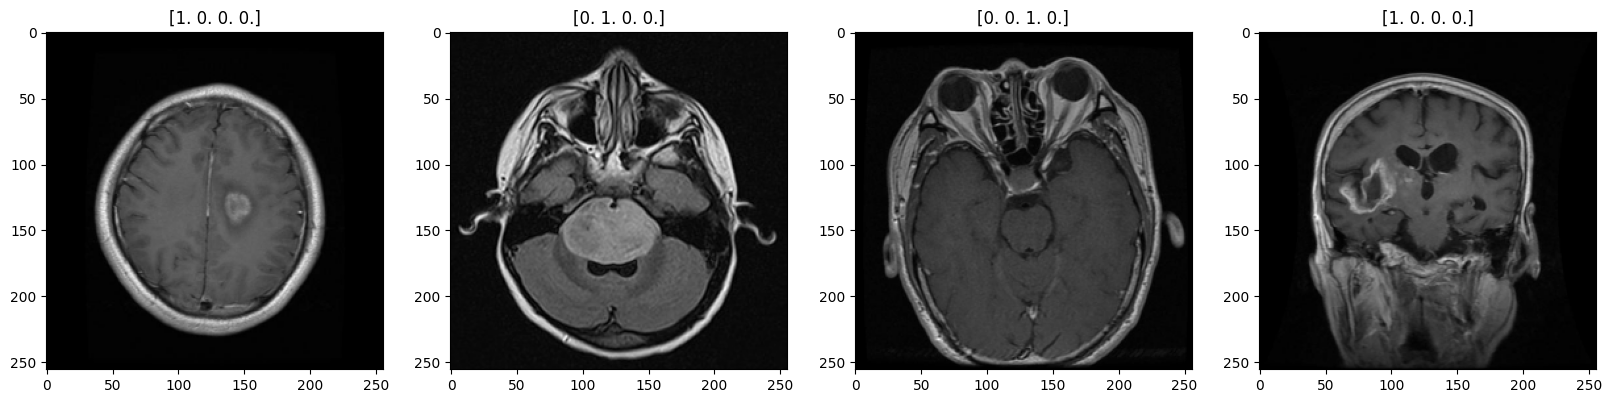

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [8]:
data = data.map(lambda x,y: (x/255, y))

In [9]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [10]:
print(len(data))

101


In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size

70

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [14]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [18]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# 7. Train

In [20]:
logdir='logs'

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
70/70 [==============================] - 535s 7s/step - loss: 1.1364 - accuracy: 0.4884 - val_loss: 0.9440 - val_accuracy: 0.5609
Epoch 2/20
70/70 [==============================] - 586s 8s/step - loss: 0.8450 - accuracy: 0.6513 - val_loss: 0.8233 - val_accuracy: 0.6562
Epoch 3/20
70/70 [==============================] - 463s 7s/step - loss: 0.6903 - accuracy: 0.7299 - val_loss: 0.5859 - val_accuracy: 0.7594
Epoch 4/20
70/70 [==============================] - 302s 4s/step - loss: 0.5738 - accuracy: 0.7656 - val_loss: 0.4905 - val_accuracy: 0.8016
Epoch 5/20
70/70 [==============================] - 316s 5s/step - loss: 0.4382 - accuracy: 0.8308 - val_loss: 0.3879 - val_accuracy: 0.8594
Epoch 6/20
70/70 [==============================] - 338s 5s/step - loss: 0.3354 - accuracy: 0.8661 - val_loss: 0.3202 - val_accuracy: 0.8922
Epoch 7/20
70/70 [==============================] - 294s 4s/step - loss: 0.2696 - accuracy: 0.8955 - val_loss: 0.3065 - val_accuracy: 0.8828
Epoch 8/20
70

# 8. Plot Performance

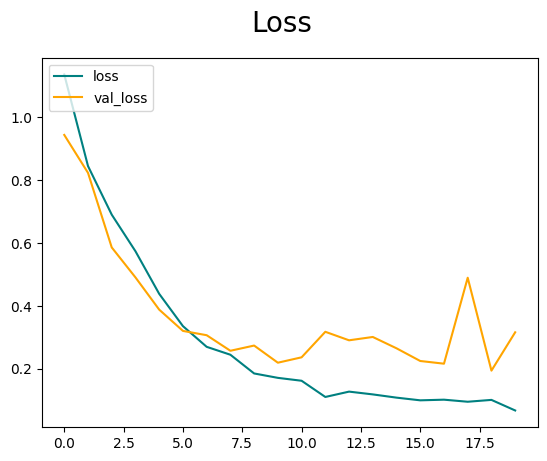

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

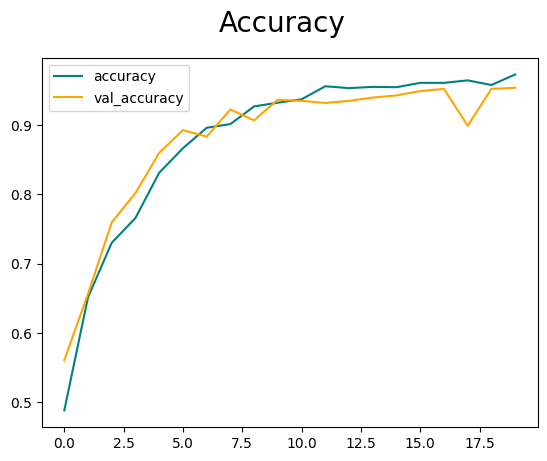

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [25]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 836ms/step


In [28]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()} , Accuracy:{acc.result().numpy()}')

Precision:0.9337539672851562,Recall:0.925000011920929 , Accuracy:0.9281250238418579


# 10. Test

In [29]:
import cv2

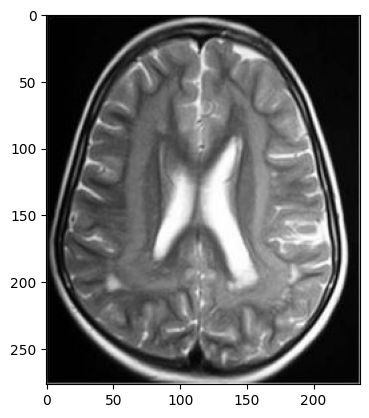

In [49]:
img = cv2.cvtColor(cv2.imread('nt_img (158).jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

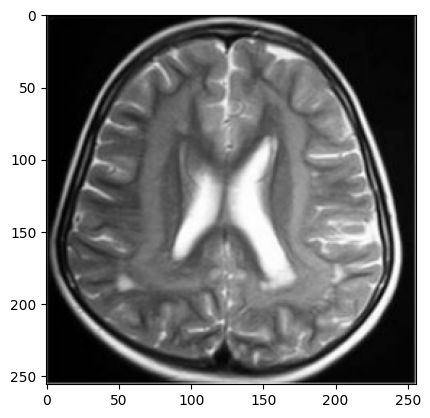

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/256, axis=0))

1/1 [==============================] - 0s 44ms/step


In [52]:
yhat

array([[6.67679764e-04, 3.22530326e-03, 1.00087064e-10, 9.96106923e-01]],
      dtype=float32)

In [53]:
predicted_class_index = np.argmax(yhat)

In [55]:
predicted_class_index

3

In [57]:
if predicted_class_index == 0:
    print(f'category1_tumor')
elif predicted_class_index == 1: 
    print(f'category2_tumor')
elif predicted_class_index == 2:
    print(f'category3_tumor')
else:
    print(f'no_tumor')

no_tumor


# 11. Save the Model

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save(os.path.join('models','Braintumor.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')